In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
import albumentations as A
from library.dataset import CustomCloudCoverDetection
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
train_ds = CustomCloudCoverDetection(
    root = './dataset',
    split = 'train',
    transforms=[A.Normalize(normalization='min_max_per_channel'), ToTensorV2()],
    download=False
    )

val_ds = CustomCloudCoverDetection(
    root = './dataset',
    split = 'val',
    transforms=[A.Normalize(normalization='min_max_per_channel'), ToTensorV2()],
    download=False
    )

test_ds = CustomCloudCoverDetection(
    root = './dataset',
    split = 'test',
    transforms=[A.Normalize(normalization='min_max_per_channel'), ToTensorV2()],
    download=False
    )

len(train_ds), len(val_ds), len(test_ds)

(414, 171, 547)

# Statistics

In [4]:
train_df = train_ds.metadata.sort_values('chip_id')
train_df.head()

,chip_id,location,datetime,cloudpath
0,aeue,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aeue
1,aewm,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aewm
2,afxz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/afxz
3,agex,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agex
4,agxr,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agxr


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

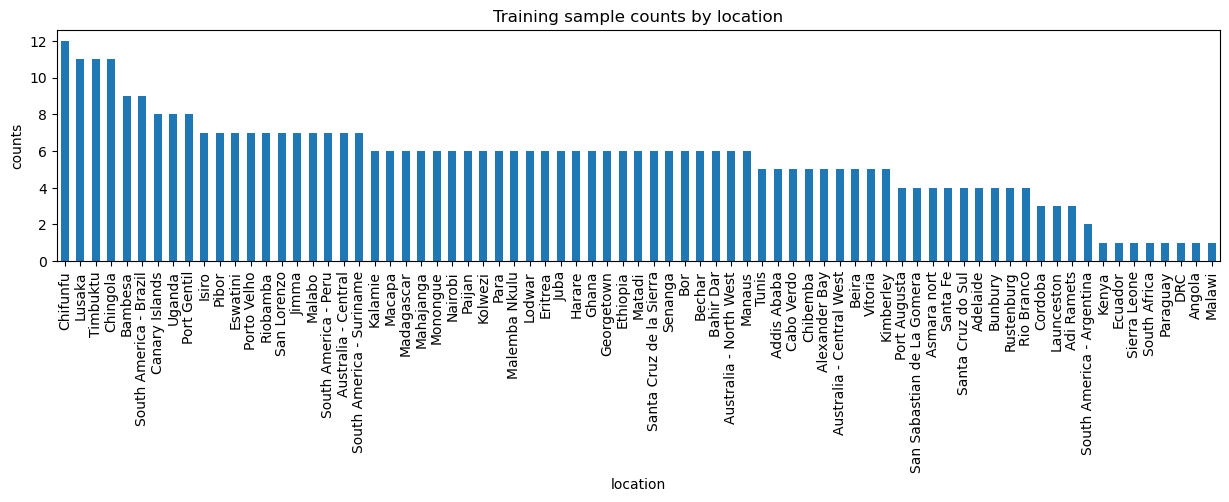

In [5]:
train_df_by_loc = train_df.groupby('location').count()
train_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Training sample counts by location')

In [6]:
val_df = val_ds.metadata.sort_values('chip_id')
val_df.head()

,chip_id,location,datetime,cloudpath
0,afkx,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/afkx
1,agtu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agtu
2,aipn,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aipn
3,ajxq,Addis Ababa,2020-09-10T07:57:42Z,az://./train_features/ajxq
4,akhq,Addis Ababa,2020-09-10T07:57:42Z,az://./train_features/akhq


<Axes: title={'center': 'Validation sample counts by location'}, xlabel='location', ylabel='counts'>

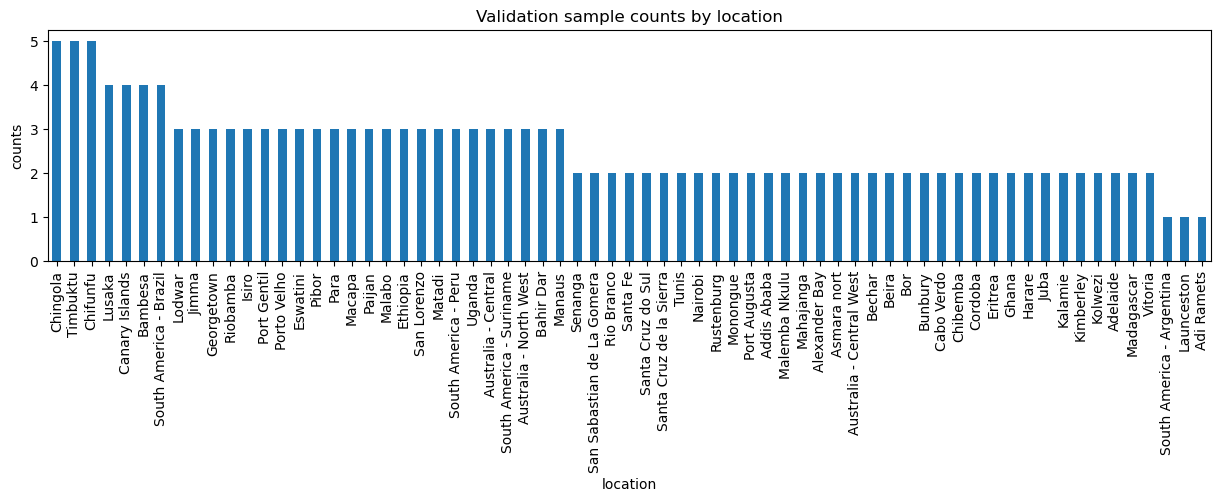

In [7]:
val_df_by_loc = val_df.groupby('location').count()
val_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Validation sample counts by location')

In [8]:
test_df = test_ds.metadata.sort_values('chip_id')
test_df.head()

,chip_id,location,datetime
0,aatv,Australia - Central East,2020-06-03T00:55:26Z
1,abft,Australia - Central East,2020-06-03T00:55:26Z
2,acur,Australia - Central East,2020-06-03T00:55:26Z
3,acuz,Australia - Central East,2020-06-03T00:55:26Z
4,acvv,Australia - Central East,2020-06-03T00:55:26Z


<Axes: title={'center': 'Test sample counts by location'}, xlabel='location', ylabel='counts'>

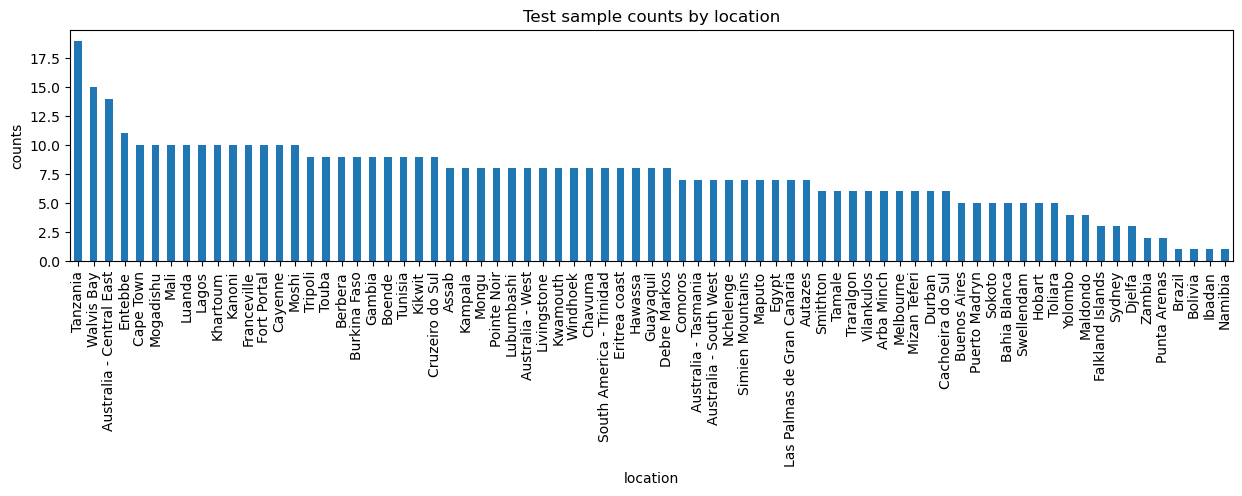

In [9]:
test_df_by_loc = test_df.groupby('location').count()
test_df_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', ylabel='counts', 
                                                          title='Test sample counts by location')

In [10]:
label_counts = [0, 0]

for i in tqdm(range(len(train_ds))):

    mask = train_ds[i]['mask'].numpy()
    labels, counts = np.unique(mask, return_counts=True)

    for idx, label in enumerate(labels):
        label_counts[label] = label_counts[label] + counts[idx]

100%|██████████| 414/414 [00:24<00:00, 17.08it/s]


Text(0.5, 1.0, 'Label Counts in Traing Masks\n(No : 41565638, Cloud : 66961978)')

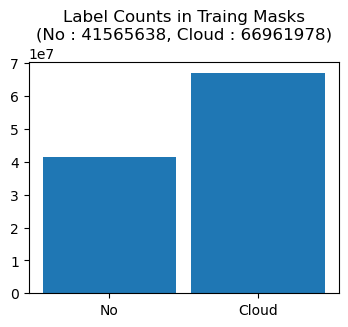

In [12]:
plt.figure(figsize=(4,3))
plt.bar(['No','Cloud'], label_counts, width=0.9)
plt.title(f"Label Counts in Traing Masks\n" \
          f"(No : {label_counts[0]}, Cloud : {label_counts[1]})")

# Visualization

nmzc
bvzx
smno


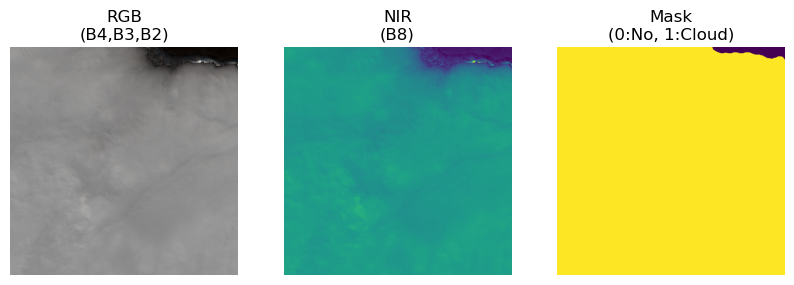

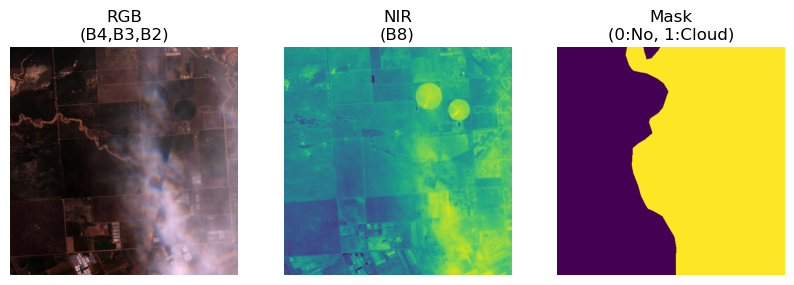

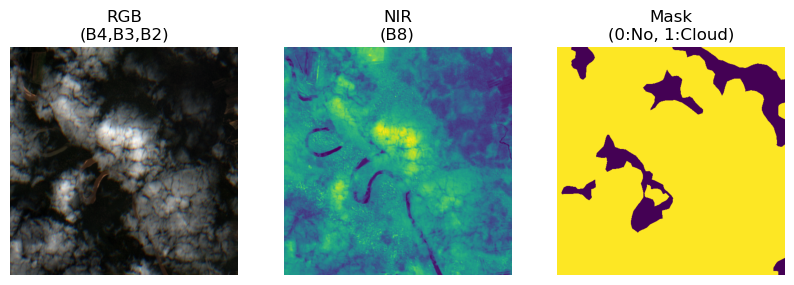

In [13]:
idxs = np.random.randint(0, len(train_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(train_ds.metadata.loc[idx,'chip_id'])
    train_ds.plot(train_ds[idx])

atac
ajxq
mayg


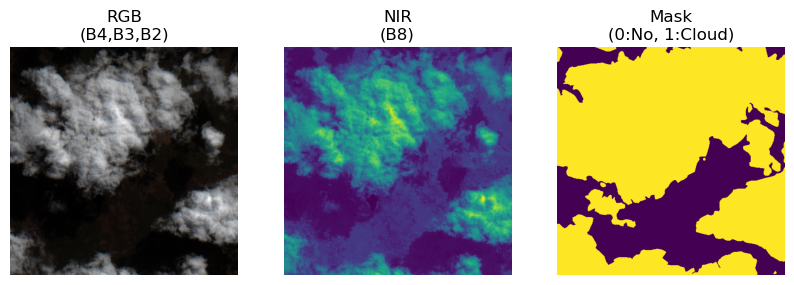

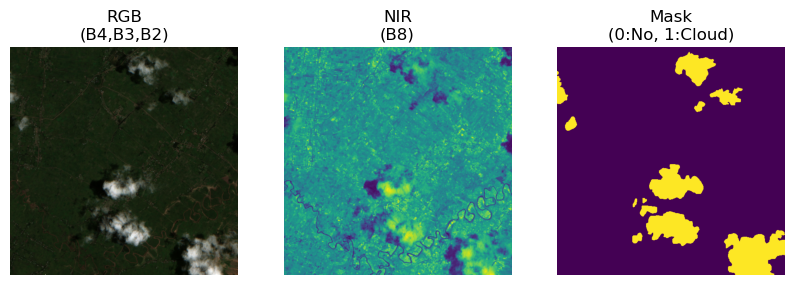

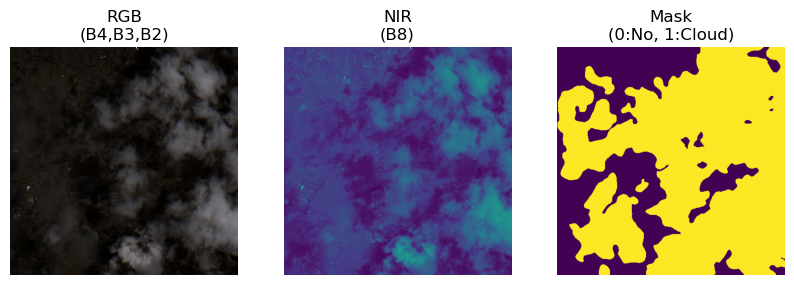

In [14]:
idxs = np.random.randint(0, len(val_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(val_ds.metadata.loc[idx,'chip_id'])
    val_ds.plot(val_ds[idx])

znlt
wqgb
uhvc


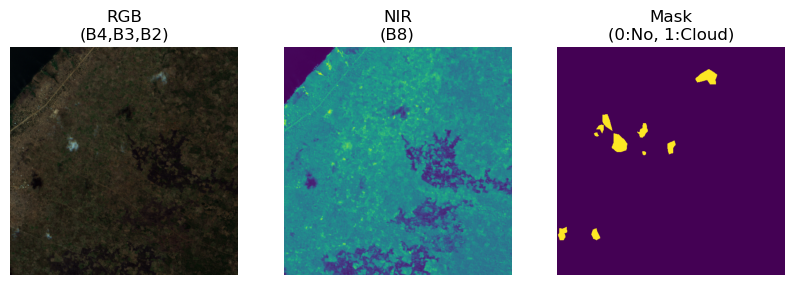

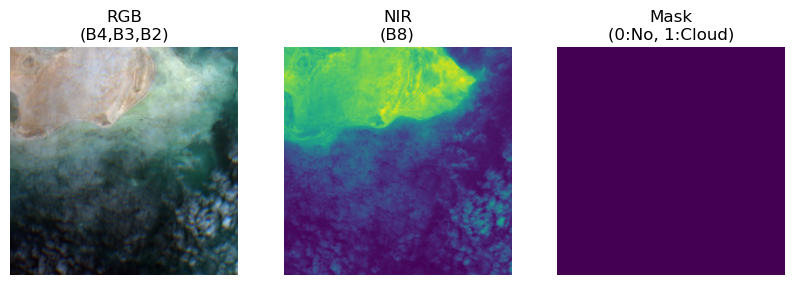

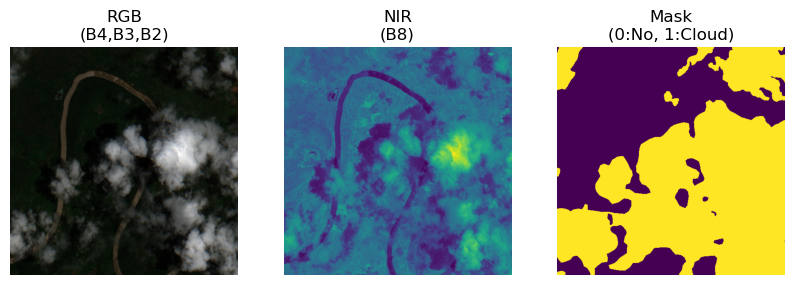

In [15]:
idxs = np.random.randint(0, len(test_ds)-1, 3)

for i, idx in enumerate(idxs):
    print(test_ds.metadata.loc[idx,'chip_id'])
    test_ds.plot(test_ds[idx])